# Sentiment in US Politics 

Author: **Dr J Rogel-Salazar**

In this notebook we run a straightforward sentiment analysis algorithm over a sample of speeches given by the two major candidates of the 2016 US election, Hillary Clinton and Donald Trump.

The speeches were given in various locations in the US and the text has been left as sourced by Nick Root.

In [1]:
%pylab inline
import pandas as pd
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
speeches = pd.read_csv('./Speeches/Speeches_Metadata.csv', na_values="")
speeches.replace(np.nan,' ', regex=True, inplace=1)

In [3]:
speeches.head()

,Speech_ID,Speaker,Date,Location 1,Location 2,Event type,Comment,File
0,1,HC,01/08/16,Omaha,Nebraska,,Use,01_HC_20160801_Omaha.txt
1,2,HC,03/08/16,Commerce City,Colorado,Speech,Use,02_HC_20160803_Colorado.txt
2,3,HC,04/08/16,Las Vegas,Nevada,Speech,Use,03_HC_20160804_Vegas.txt
3,4,HC,05/08/16,,Washington DC,Speech,Use,04_HC_20160805_Wash.txt
4,5,HC,08/08/16,St. Petersburg,Florida,Speech,Use,05_HC_20160808_StPetes.txt


In [4]:
sp = speeches[speeches['Comment']=="Use"]
sp.is_copy = False

In [5]:
fnames = "./Speeches/" + sp['Speaker'] + '/' + sp["File"]

# Sentiment

In this example we create a straightforward sentiment analysis based on individual words used. More complex information can be extracted by looking a combination of words (bigrams for example), but for the purposes of this demo it will suffice to look at monograms.

In [6]:
from string import punctuation

fsentim = ['positive.txt', 'negative.txt',]

In [7]:
# Getting th positive and negative words
pos_sent = open('./Sentiment_Words/' + fsentim[0]).read()
positive_words = pos_sent.split('\n')

neg_sent = open('./Sentiment_Words/' + fsentim[1]).read()
negative_words = neg_sent.split('\n')

Adding a list of stop words in English

In [8]:
from nltk.corpus import stopwords
stopset = set(stopwords.words('english'))
 
def stopword_filter(words):
    return [word for word in words if word not in stopset]
 

# Using a word count approach

In [9]:
# Initialising lists to hold sentiment average values
pos_avg = []
neg_avg = []

for fname in fnames:
    # Initialising list to hold count of positive
    # and negative words
    positive_counts = []
    negative_counts = []

    with open(fname, encoding="latin") as infile:

        # Cleaning lines in the file
        for line in infile:
            lline = line.lower()
            for p in list(punctuation):
                lline = lline.replace(p, '')
            
            re.sub('\s+', ' ', lline).strip()

            words = lline.split(' ')
            mwords = stopword_filter(words)
            word_count = len(mwords)
            
            # Counting positive and negative words
            positive_counter=0
            negative_counter=0
            for word in words:
                if word in positive_words:
                    positive_counter += 1
                elif word in negative_words:
                    negative_counter += 1

            positive_counts.append(positive_counter/word_count)
            negative_counts.append(negative_counter/word_count)

        pos_avg.append(np.mean(positive_counts))
        neg_avg.append(np.mean(negative_counts))

In [10]:
sp['positive_avg']=pos_avg

In [11]:
sp['negative_avg']=neg_avg

In [12]:
sp[['Speech_ID', 'Speaker', 'positive_avg','negative_avg']]

,Speech_ID,Speaker,positive_avg,negative_avg
0,1,HC,0.080675,0.026952
1,2,HC,0.084656,0.027000
2,3,HC,0.084236,0.031590
3,4,HC,0.095298,0.041599
4,5,HC,0.081986,0.020593
5,6,HC,0.105439,0.032817
6,7,HC,0.082305,0.058526
7,8,HC,0.113955,0.044439
8,9,HC,0.089276,0.035332
9,10,HC,0.125443,0.046042


# Let us use TextBlob for sentiment analysis


In [13]:
from textblob import TextBlob


In [14]:
# Initialising list to hold sentiment and subjectivity values
sentiment = []
subjectivity = []

for fname in fnames:

    with open(fname, 'r', encoding="latin") as infile:
        content = infile.read()
        
        blob = TextBlob(content)
        # Calculating sentiment and subjectivity
        sentiment.append(blob.sentiment.polarity)
        subjectivity.append(blob.sentiment.subjectivity)

In [15]:
sp['sentiment']=sentiment
sp['subjectivity']=subjectivity

In [16]:
sp[['Speech_ID', 'Speaker', 'sentiment']].head()

,Speech_ID,Speaker,sentiment
0,1,HC,0.152623
1,2,HC,0.168907
2,3,HC,0.171133
3,4,HC,0.122291
4,5,HC,0.141604


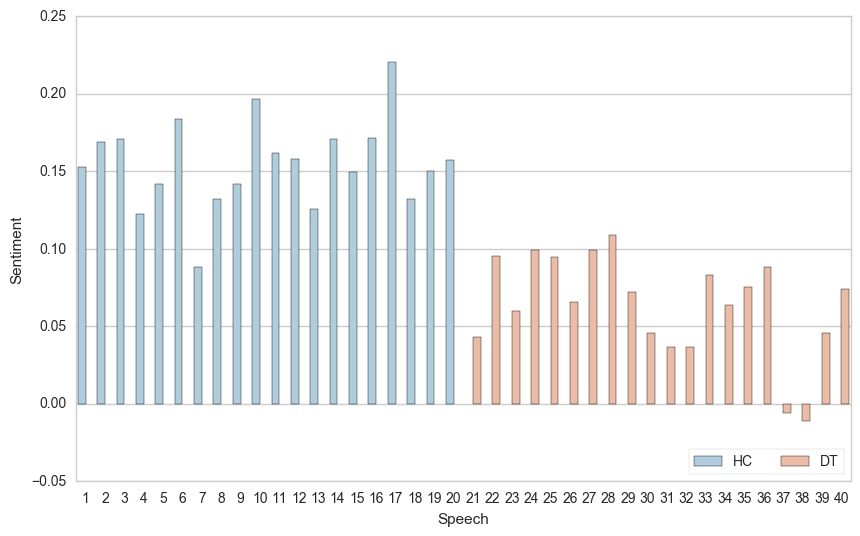

In [17]:
import seaborn as sns
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the sentiment
sns.barplot(x="Speech_ID", y="sentiment", hue='Speaker', data=sp, palette=sns.color_palette("RdBu_r", 2))

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Speech")
ax.set(ylabel="Sentiment")
# sns.despine(left=True, bottom=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1133595c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1161c0780>], dtype=object)

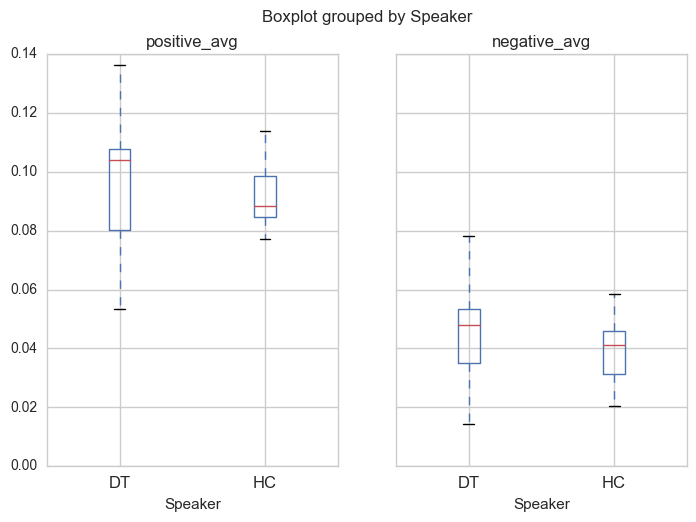

In [18]:
sp.boxplot(['positive_avg','negative_avg'], 'Speaker')